In [1]:
## Notebook env: mirtud_env (R kernel)

In [2]:
library(escape)
library(dittoSeq)
library(SingleCellExperiment)
library(Seurat)
library(SeuratObject)
library(stringr)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats

In [3]:
tRF_loaded_seuratobj <- readRDS('/home/ssobti/projects/mir_tud/010523_filtered_data/tRF_normalized_integrated_seurat.rds')
meta = tRF_loaded_seuratobj@meta.data

meta$guide[str_sub(meta$guide, 1, 3) == 'TuD'] <- 'TuD_NC'
tRF_loaded_seuratobj@meta.data <- meta
sce <- as.SingleCellExperiment(tRF_loaded_seuratobj, assay = "RNA")

In [4]:
GS.hallmark <- getGeneSets(library = "H")

In [5]:
ES.tRF.ssGSEA <- enrichIt(obj = sce, 
                      method = "ssGSEA",
                      gene.sets = GS.hallmark, 
                      groups = 1000, cores = 10, 
                      min.size = 5)

[1] "Using sets of 1000 cells. Running 24 times."
Setting parallel calculations through a SnowParam back-end
with workers=10 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."
Setting parallel calculations through a SnowParam back-end
with workers=10 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."
Setting parallel calculations through a SnowParam back-end
with workers=10 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."
Setting parallel calculations through a SnowParam back-end
with workers=10 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."
Setting parallel calculations through a SnowParam back-end
with workers=10 and tasks=100.
Estimating ssGSEA scores for

In [6]:
ES.tRF.UCell <- enrichIt(obj = sce, 
                   gene.sets = GS.hallmark, 
                   method = "UCell",
                   groups = 1000, cores = 10, 
                   min.size = 5)

[1] "Using sets of 1000 cells. Running 24 times."


In [7]:
save(ES.tRF.ssGSEA, ES.tRF.UCell, file = '/home/ssobti/projects/mir_tud/output_data/genexp_pathway/escape/tRF_escape_hallmark_out.RData')

In [8]:
load('/home/ssobti/projects/mir_tud/output_data/genexp_pathway/escape/tRF_escape_hallmark_out.RData')

In [9]:
sce_tRF_ssGSEA = sce
sce_tRF_UCell = sce

In [10]:
met.data <- merge(colData(sce_tRF_ssGSEA), ES.tRF.ssGSEA, by = "row.names", all=TRUE)
row.names(met.data) <- met.data$Row.names
met.data$Row.names <- NULL
colData(sce_tRF_ssGSEA) <- met.data

In [11]:
met.data <- merge(colData(sce_tRF_UCell), ES.tRF.ssGSEA, by = "row.names", all=TRUE)
row.names(met.data) <- met.data$Row.names
met.data$Row.names <- NULL
colData(sce_tRF_UCell) <- met.data

In [12]:
colors <- colorRampPalette(c("#0D0887FF","#7E03A8FF","#CC4678FF","#F89441FF","#F0F921FF"))

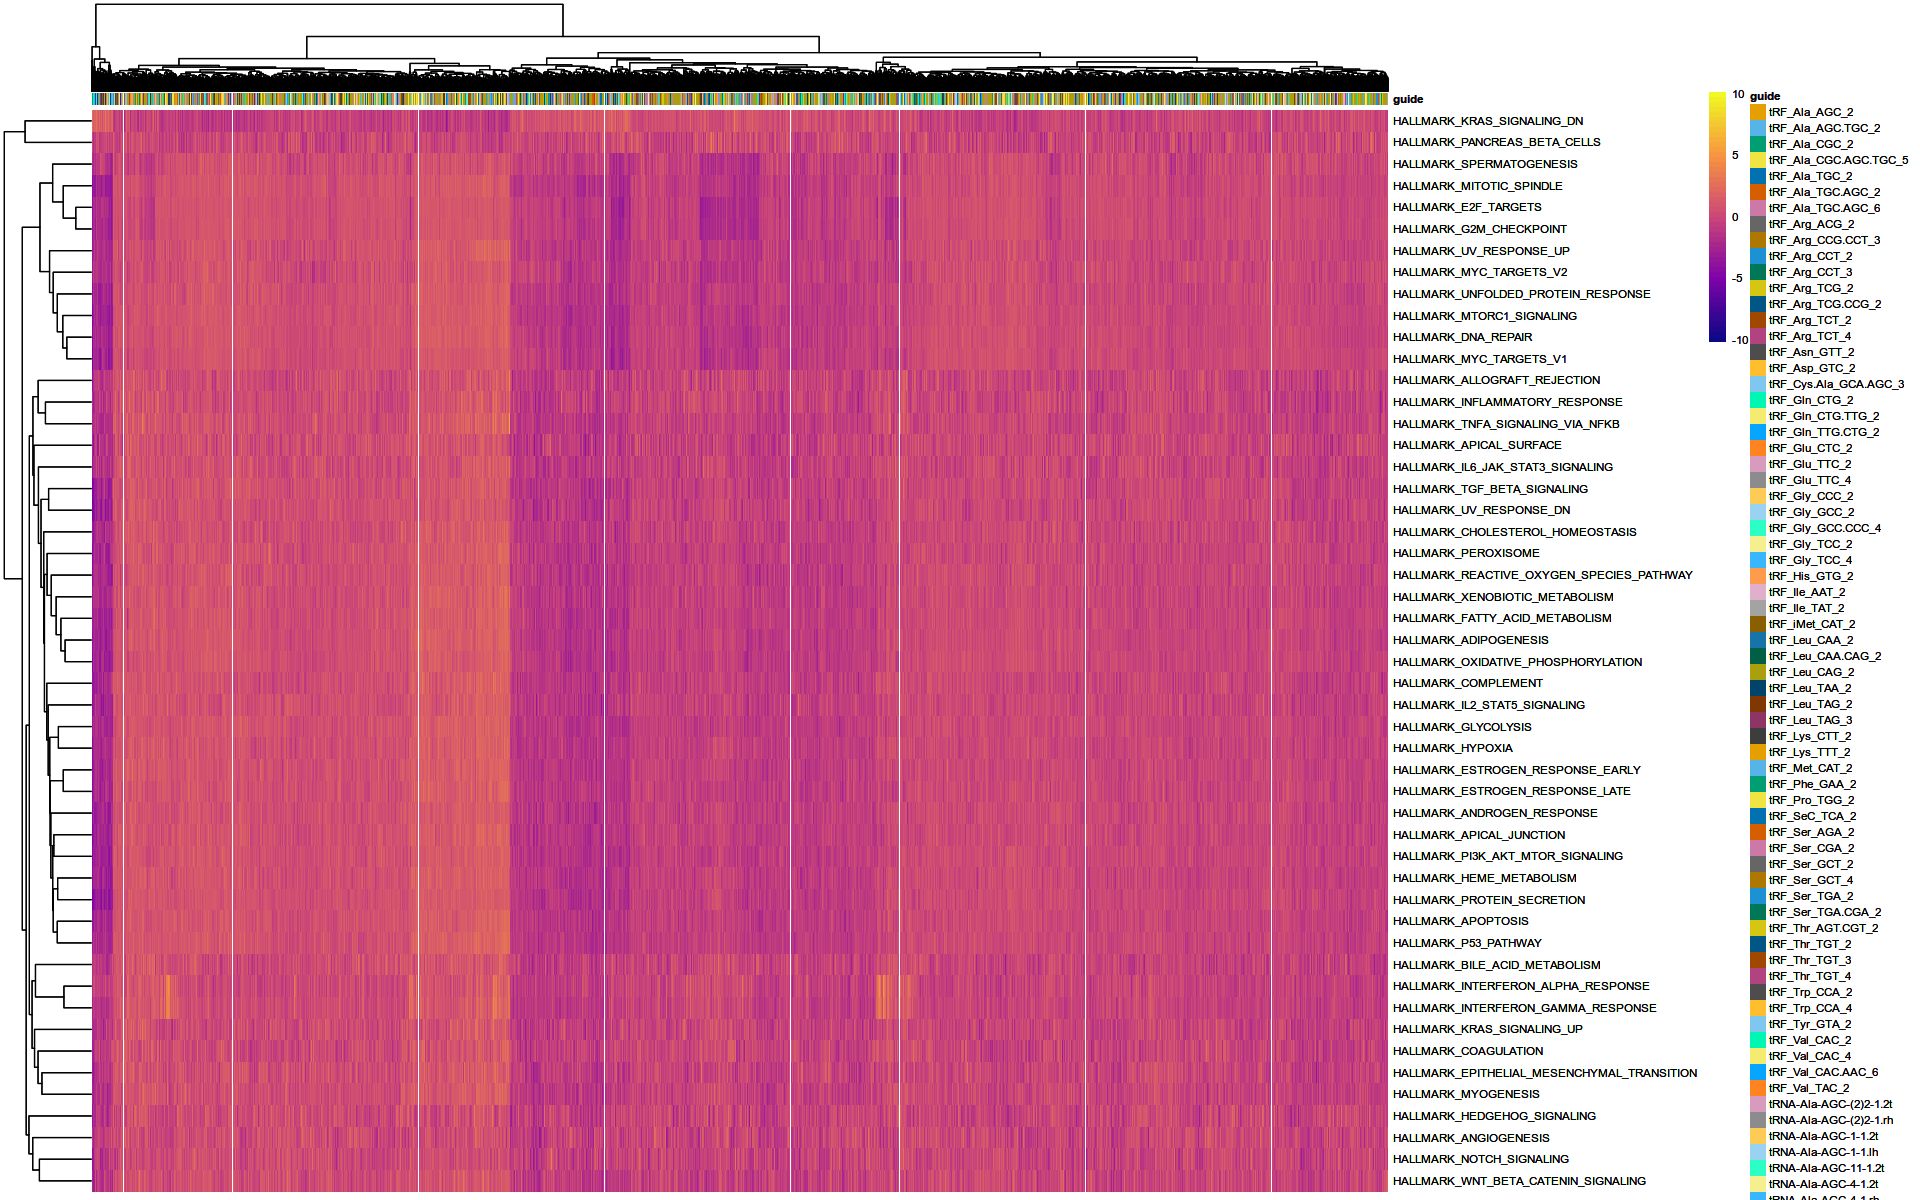

In [13]:
options(repr.plot.width = 16, repr.plot.height = 10)
dittoHeatmap(sce_tRF_ssGSEA, genes = NULL, metas = names(ES.tRF.ssGSEA), 
             annot.by = "guide", 
             fontsize = 7, 
             cluster_cols = TRUE,
             heatmap.colors = colors(50))

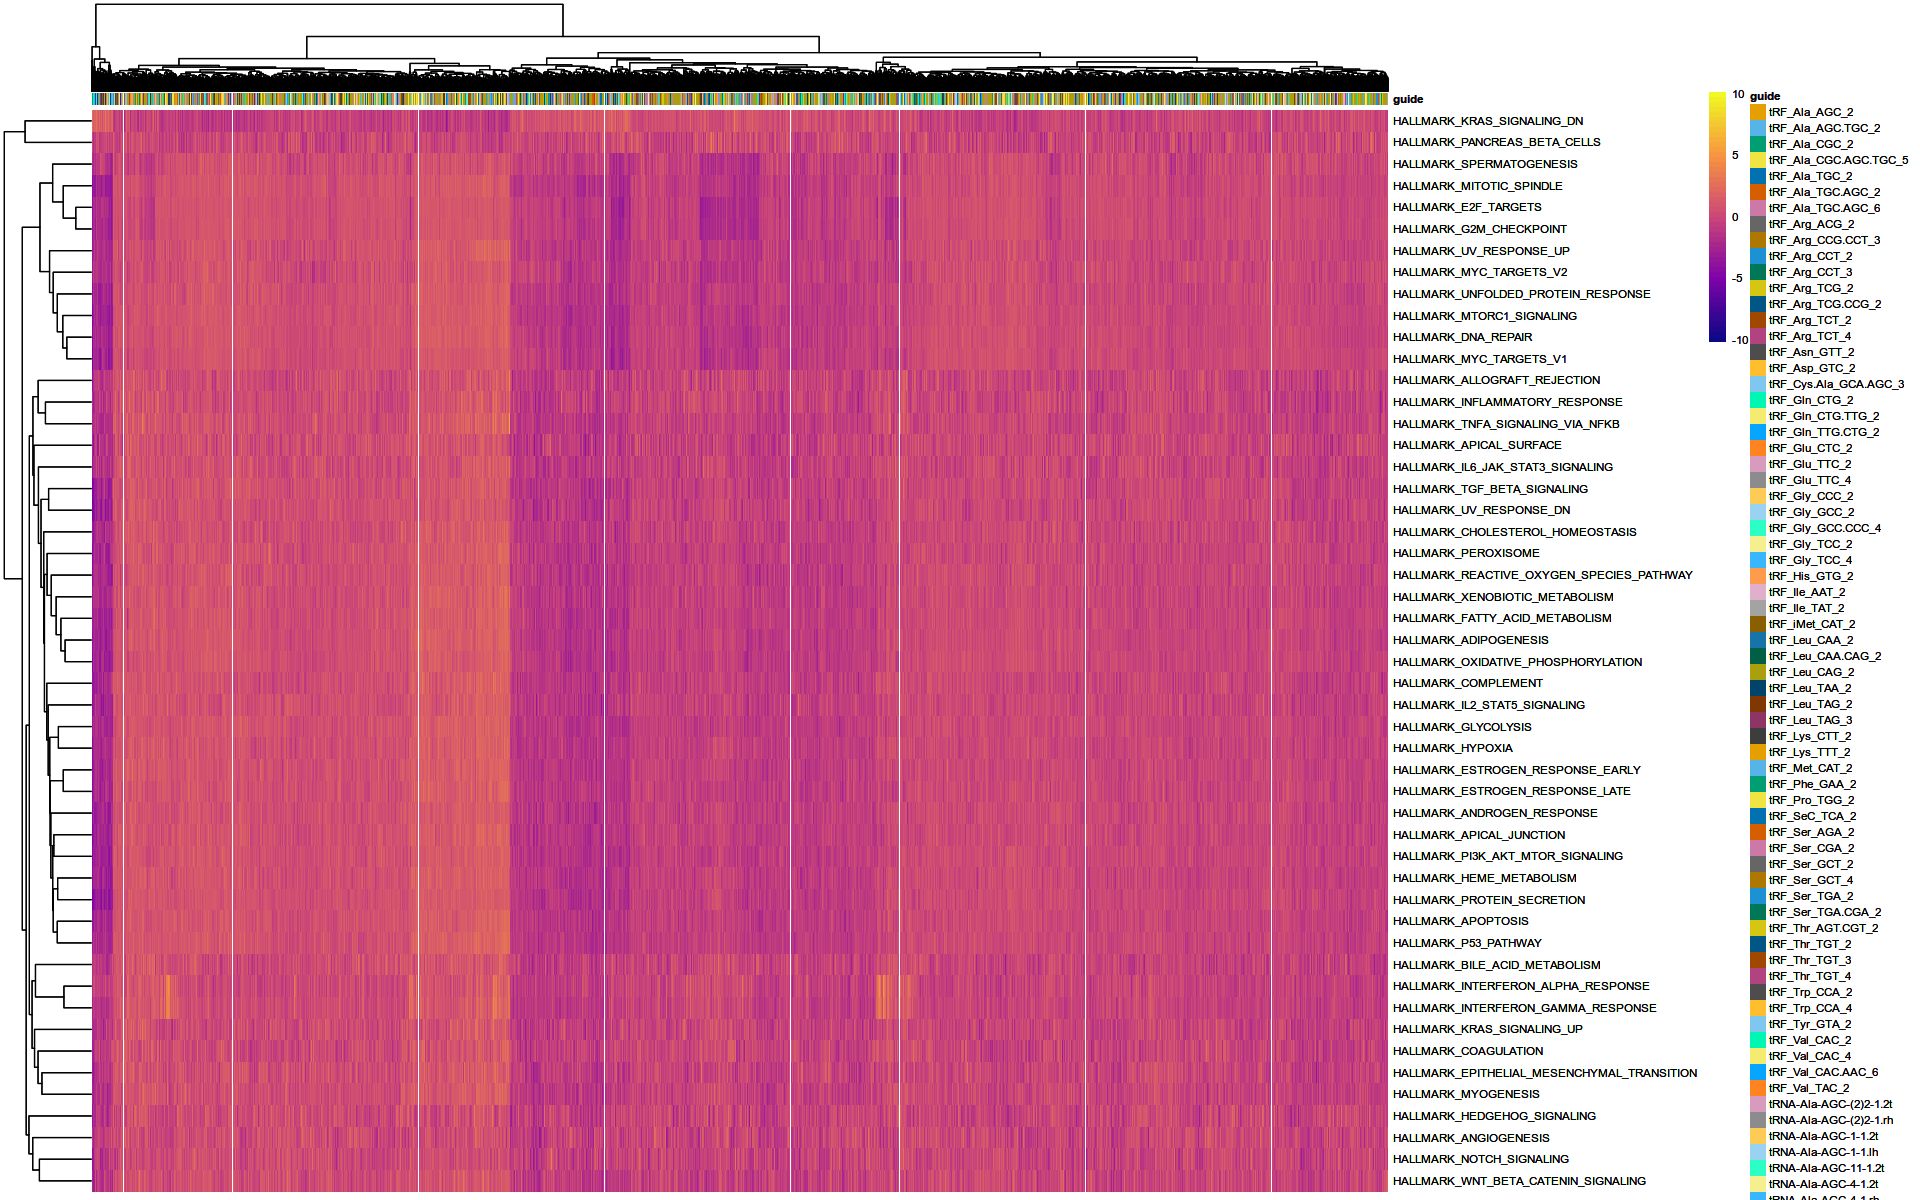

In [14]:
options(repr.plot.width = 16, repr.plot.height = 10)
dittoHeatmap(sce_tRF_UCell, genes = NULL, metas = names(ES.tRF.UCell), 
             annot.by = "guide", 
             fontsize = 7, 
             cluster_cols = TRUE,
             heatmap.colors = colors(50))